In [6]:
import numpy as np #    linear algebra
import pandas as pd #    data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #    data visualization
import matplotlib.pyplot as plt #    plotting library
import warnings #    to ignore warnings
import os #    to interact with the operating system
warnings.filterwarnings('ignore')

In [7]:
Titanic_df = pd.read_csv('D:\\AI & Machine Learning\\train.csv')
Titanic_df.head(5) #    to display the first 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
Titanic_df.drop (['PassengerId'], axis=1, inplace=True) #    drop the PassengerId column
Titanic_df.drop (['Name'], axis=1, inplace=True) #    drop the Name column  
Titanic_df.drop (['Ticket'], axis=1, inplace=True) #    drop the Ticket column
Titanic_df.head() #    to display the first 5 rows of the dataset after dropping the columns

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
#check for data types:
D_types = Titanic_df.dtypes
num_unique = Titanic_df.nunique()
#    to display the data types and number of unique values in each column
pd.DataFrame({'Data Type': D_types, 'Num Unique': num_unique}).T #    to create a DataFrame with the data types and number of unique values
# T is refers to transpose the DataFrame, which means that the rows and columns are swapped.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Data Type,int64,int64,object,float64,int64,int64,float64,object,object
Num Unique,2,3,2,88,7,7,248,147,3


In [10]:
#change the data types of incorrect datatypes to correct datatypes:
cols=["Pclass", "SibSp", "Parch", "Embarked", "Survived"]
Titanic_df[cols] = Titanic_df[cols].astype('category') #    to change the data types of the columns to category
pd.DataFrame(Titanic_df.dtypes).T #    to display the data types of the columns after changing them to category
Titanic_df['Age'] = Titanic_df['Age'].astype('int') #    to change the data type of the Age column to int, ignoring errors for NaN values

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
print (Titanic_df.shape[0]) #    to display the number of rows in the dataset
print (Titanic_df.shape[1]) #    to display the number of columns in the dataset

891
9


In [ ]:
#check for data types:
D_types = Titanic_df.dtypes
num_unique = Titanic_df.nunique()
#    to display the data types and number of unique values in each column
pd.DataFrame({'Data Type': D_types, 'Num Unique': num_unique}).T #    to create a DataFrame with the data types and number of unique values
# T is refers to transpose the DataFrame, which means that the rows and columns are swapped.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Data Type,category,category,object,int64,category,category,float64,category
Num Unique,2,3,2,53,7,7,204,3


In [ ]:
#Check for Null Values:
null = Titanic_df.isnull().sum() #    to check for null values in the dataset
ratio = null / Titanic_df.shape[0] #    to calculate the ratio of null values to the total number of rows in the dataset
pd.DataFrame({'Null Sum': null, 'Ratio': ratio}).T #    to create a DataFrame with the null values and their ratio

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null Sum,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245


In [ ]:
#Drop null values in Embarked column:
Titanic_df = Titanic_df.dropna(subset=['Embarked']) #    to drop the null values in the Embarked column

In [ ]:
#Drop all Cabin column :
Titanic_df = Titanic_df.drop("Cabin", axis=1) #    to drop the Cabin column

In [ ]:
print (Titanic_df.shape[0]) #    to display the number of rows in the dataset
print (Titanic_df.shape[1]) #    to display the number of columns in the dataset

889
8


In [ ]:
#Check for Null Values:
null = Titanic_df.isnull().sum() #    to check for null values in the dataset
ratio = null / Titanic_df.shape[0] #    to calculate the ratio of null values to the total number of rows in the dataset
pd.DataFrame({'Null Sum': null, 'Ratio': ratio}).T #    to create a DataFrame with the null values and their ratio

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null Sum,0.0,0.0,0.0,177.0000,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.1991,0.0,0.0,0.0,0.0


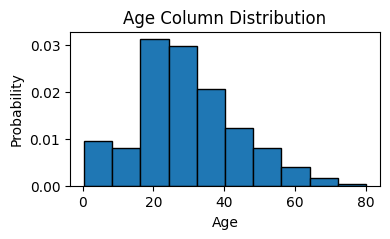

In [ ]:
#To correct Ages Values:
#Replace the null values in the Age column with the mean of the Age column:

#To set the age column distribution histogram:
plt.figure(figsize=(4, 2)) #    to create a figure with a size of 4X2 inches
plt.hist(Titanic_df['Age'], density=True, edgecolor="black") #    to create a histogram of the Age column with density=True and edgecolor="black"
plt.title("Age Column Distribution") #    to set the title of the histogram to "Age Column Distribution"
plt.xlabel("Age") #    to set the x-axis label to "Age"
plt.ylabel("Probability") #    to set the y-axis label to "probability"
plt.show() #    to display the histogram

In [ ]:
#To fill the null values in the Age column with the mean of the Age column:
median = Titanic_df['Age'].mean() #    to calculate the mean of the Age column
Titanic_df['Age'].fillna(median, inplace=True) #    to fill the null values in the Age column with the mean of the Age column


In [ ]:
#To make sure that the null values in the Age column are filled with the mean of the Age column:
pd.DataFrame(Titanic_df.isnull().sum()).T #    to check for null values in the Age column after filling them with the mean of the Age column

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,0,0,0,0,0,0


Index(['Age', 'Fare'], dtype='object')


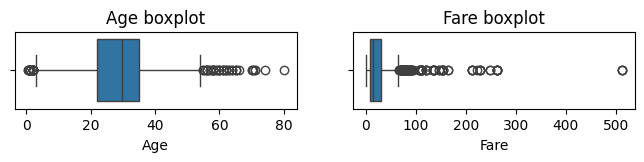

In [ ]:
# Handle Outliers:
#1- check for outliers in the Age column:
num_columns = Titanic_df.select_dtypes("number").columns #   to select the numerical columns in the dataset
plt.figure(figsize=(8, 1)) #    to create a figure with a size of 8X1 inches
print (num_columns) #    to display the numerical columns in the dataset

for i, col in enumerate(num_columns):
    plt.subplot(1, 2, i+1)
    sns.boxplot(Titanic_df[col], orient="h") #    to create a boxplot of the numerical columns in the dataset with orientation "h"
    plt.title(f"{col} boxplot") #    to set the title of the boxplot to the name of the column

In [ ]:
#2- Remove outliers in the Age column:
for col in num_columns:
    Q1 = Titanic_df[col].quantile(0.25) #    to calculate the first quartile of the column
    Q3 = Titanic_df[col].quantile(0.75) #    to calculate the third quartile of the column
    IQR = Q3 - Q1 #    to calculate the interquartile range of the column
    lower_fence = Q1 - 1.5 * IQR #    to calculate the lower bound of the column
    upper_fence = Q3 + 1.5 * IQR #    to calculate the upper bound of the column
    
    lower_outliers = Titanic_df[Titanic_df[col] < lower_fence ][col].values#    to calculate the lower outliers of the column
    upper_outliers = Titanic_df[Titanic_df[col] > upper_fence ][col].values#    to calculate the upper outliers of the column
    
    Titanic_df[col].replace(lower_outliers, lower_fence, inplace=True) #    to replace the lower outliers with the lower bound of the column
    Titanic_df[col].replace(upper_outliers, upper_fence, inplace=True) #    to replace the upper outliers with the upper bound of the column

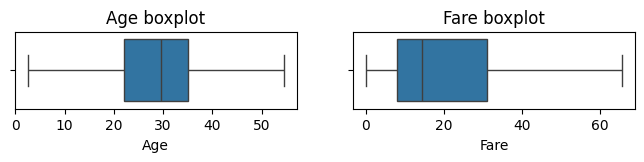

In [ ]:
#To make sure that the outliers in the Age column are removed:
plt.figure(figsize=(8, 1)) #    to create a figure with a size of 8X1 inches
for i, col in enumerate(num_columns):
    plt.subplot(1, 2, i+1)
    sns.boxplot(Titanic_df[col], orient="h") #    to create a boxplot of the numerical columns in the dataset with orientation "h"
    plt.title(f"{col} boxplot") #    to set the title of the boxplot to the name of the column

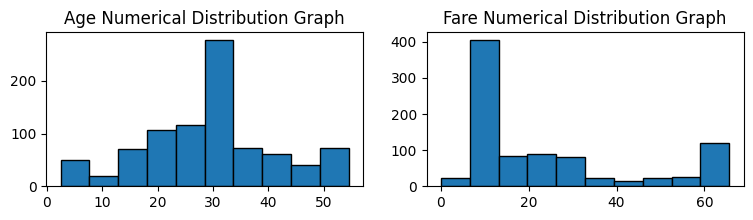

In [ ]:
#Visualize the data:
#1- To visualize the data in the dataset using a histogram (Numerical Data Distribution):

num_columns = Titanic_df.select_dtypes("number").columns #    to select the numerical columns in the dataset
plt.figure(figsize=(9, 2)) #    to create a figure with a size of 8X1 inches
for i, col in enumerate(num_columns):
    plt.subplot(1, 2, i+1)
    plt.hist(Titanic_df[col], edgecolor='black') #    to create a histogram of the numerical columns in the dataset with kde=True
    plt.title(f"{col} Numerical Distribution Graph") #    to set the title of the histogram to the name of the column
    

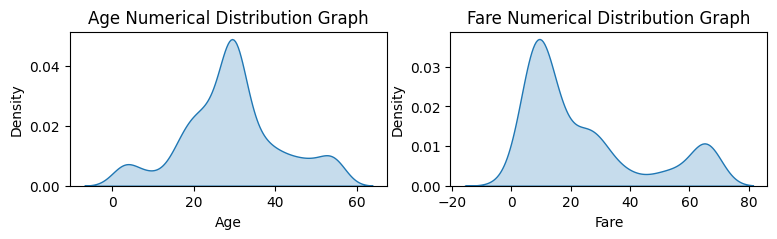

In [ ]:
#2- To visualize the data in the dataset using a KDE plot (Numerical Data Distribution):
num_columns = Titanic_df.select_dtypes("number").columns #    to select the numerical columns in the dataset
plt.figure(figsize=(9, 2)) #    to create a figure with a size of 8X1 inches
for i, col in enumerate(num_columns):
    plt.subplot(1, 2, i+1)
    sns.kdeplot(Titanic_df[col], fill=True) #    to create a KDE plot of the numerical columns in the dataset with fill=True
    plt.title(f"{col} Numerical Distribution Graph") #    to set the title of the KDE plot to the name of the column

In [ ]:
#

In [ ]:
#Remove Duplicates:
#1- Check for duplicates in the dataset:
duplicates = Titanic_df.duplicated().sum() #    to check for duplicates in the dataset
print (duplicates) #    to display the number of duplicates in the dataset

0


In [ ]:
#Make sure that we Remove Duplicates:
Titanic_df.drop_duplicates(inplace=True) #    to remove the duplicates in the dataset
Titanic_df.duplicated().sum() #    to check for duplicates in the dataset after removing them

np.int64(0)

In [ ]:
#Data Splitting:
#1- To split the data into target and features sets:
y = Titanic_df['Survived'] #    to set the target variable to the Survived column
X = Titanic_df.drop(['Survived'], axis=1) #    to set the features variable to the dataset without the Survived column

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,NaN,Q
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,NaN,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 784, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
pip install sklearn.preprocessing

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Normalization:
#1- To normalize the data using MinMaxScaler:
from sklearn.preprocessing import MinMaxScaler #    to import the MinMaxScaler class from the sklearn.preprocessing module
num_columns = X.select_dtypes("number").columns #    to select the numerical columns in the dataset
scaler = MinMaxScaler() #    to create an instance of the MinMaxScaler class
scaler.fit(X[num_columns]) #    to fit the scaler to the numerical columns in the dataset
X[num_columns] = scaler.transform(X[num_columns]) #    to transform the numerical columns in the dataset using the scaler


In [ ]:
pip install category_encoders

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 493.7 kB/s eta 0:00:22
   - -------------------------------------- 0.5/11.1 MB 493.7 kB/s eta 0:00:22
   -- ------------------------------------- 0.8/11.1 MB 532.8 kB/s eta 0:00:20
   -- ------------------------------------- 0.8/11.1 MB 532.8 kB/s eta 0:00:20
   --- ------------------------------------ 1.0/11.1 MB 553.0 kB/s eta 0:00:19
   --- ------------------------------------ 1.0/11.1 MB 553.0 kB/s eta 0:00:19
   ---- ----------------------------------- 1.3/11.1 MB 559.2 kB/s eta 0:00:18
   ---- -------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Encoding:
#1- To check for Number of Unique Values in the dataset:
str_columns = ["Sex", "Embarked"] #    to set the string columns to numerical columns
pd.DataFrame(X[str_columns].nunique()).T #    to create a DataFrame with the number of unique values in the string columns

,Sex,Embarked
0,2,3


In [ ]:
#2- By using OneHotEncoder:
from category_encoders import OneHotEncoder #    to import the OneHotEncoder class from the category_encoders module
encoder = OneHotEncoder(cols=str_columns) #    to create an instance of the OneHotEncoder class with the string columns
z = encoder.fit_transform(X) #    to fit and transform the dataset using the encoder

In [ ]:
z

,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Cabin,Embarked_1,Embarked_2,Embarked_3,Embarked_4
0,3,1,0,0.271174,1,0,0.014151,NaN,1,0,0,0
1,1,0,1,0.472229,1,0,0.139136,C85,0,1,0,0
2,3,0,1,0.321438,0,0,0.015469,NaN,1,0,0,0
3,1,0,1,0.434531,1,0,0.103644,C123,1,0,0,0
4,3,1,0,0.434531,0,0,0.015713,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,3,0,1,0.484795,0,5,0.056848,NaN,0,0,1,0
887,1,0,1,0.233476,0,0,0.058556,B42,1,0,0,0
888,3,0,1,NaN,1,2,0.045771,NaN,1,0,0,0
889,1,1,0,0.321438,0,0,0.058556,C148,0,1,0,0
